In [293]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd
import matplotlib.pyplot as plt

rc('text',usetex = True)
rc('font', family='serif')

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [294]:
workbook = xlrd.open_workbook('Input.xlsx')
worksheet = workbook.sheet_by_name('Data')

In [3]:
N = 86
R1 = zeros(N)
R2 = zeros(N)
R3 = zeros(N)
R4 = zeros(N)
B_rem = zeros(N)
Pi1 = zeros(N)
Pi2 = zeros(N)
B = zeros(N)

for i in range(N):
    R1[i] = worksheet.cell(0, i).value
    R2[i] = worksheet.cell(1, i).value
    R3[i] = worksheet.cell(2, i).value
    R4[i] = worksheet.cell(3, i).value
    B_rem[i] = worksheet.cell(4, i).value
    B[i] = worksheet.cell(5, i).value
    #B[i] = worksheet.cell(6, i).value

In [4]:
h = R3-R2
V_magnet = (R4**2 - R3**2 + R2**2-R1**2)
V_gap = (R3**2 - R2**2)
eta_vol = (B/B_rem)*((R3**2-R2**2)/(R4**2 - R3**2 + R2**2-20**2-R1**2))**0.5
V_in = R2**2 - R1**2
V_out = R4**2 - R3**2
V_t = R4**2 - R1**2

In [5]:
B[36:56]

array([1.7 , 1.2 , 1.35, 1.5 , 1.65, 1.8 , 1.15, 1.3 , 1.45, 1.6 , 1.75,
       1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05, 1.2 , 1.35, 1.5 ])

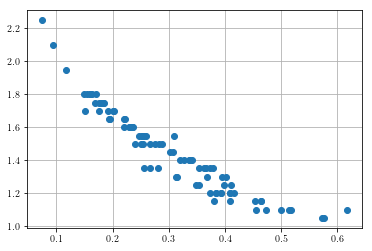

In [6]:
#plt.plot(V_magnet,eta,'o')
#plt.plot((V_gap[0:12]/(V_out[0:12]*0.6)),B[0:12],'o')
#plt.plot((V_gap[12:24]/(V_out[12:24]*0.6)),B[12:24],'o')
#plt.plot((V_gap[24:36]/(V_out[24:36]*0.6)),B[24:36],'o')
#plt.plot((V_gap[36:56]/(V_out[36:56]*0.6)),B[36:56],'o')
#plt.plot((V_gap[48:59]/(V_out[48:59]*0.6)),B[48:59],'o')

plt.plot((V_gap/(V_out*0.6)),B,'o')

plt.grid()

In [7]:
def eta(X,a,b,c,d): 
    P1,P2,P3 = X
    #return (a*((np.log(P1**b))+(np.log(P2**c))+(np.log(P3**d))+(np.log(P4**e)))*(P5**f))
    return (a*(P1**b)*(P2**c)*(P3**d))

In [8]:
M1 = curve_fit(eta,(R2,R3,R4),B/B_rem)
#M = curve_fit(eta,phi, Qc,bounds=([-100,-100], [100,100]))
M1[0]

array([ 0.7390256 ,  1.49668268, -2.71694101,  1.23379933])

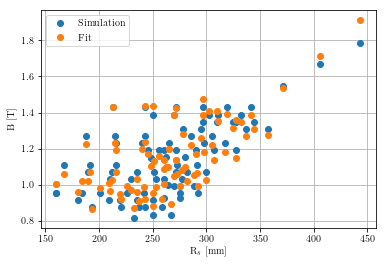

In [9]:
plt.plot(R4,B/B_rem,'o',label = 'Simulation')
plt.plot(R4,eta((R2,R3,R4),M1[0][0],M1[0][1],M1[0][2],M1[0][3]),'o',label  = 'Fit')
plt.grid()
plt.legend()
plt.xlabel('R$_s$ [mm]')
plt.ylabel('B [T]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

In [10]:
Erro = abs(B/B_rem - eta((R2,R3,R4),M1[0][0],M1[0][1],M1[0][2],M1[0][3]))/(B/B_rem)*100

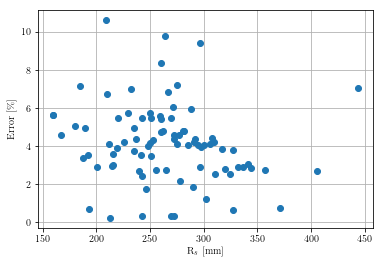

In [11]:
plt.plot(R4,Erro,'o')
plt.grid()
plt.xlabel('R$_s$ [mm]')
plt.ylabel('Error [$\%$]')
plt.savefig('MagnetError.png',format = 'png', dpi=1000,bbox_inches='tight')

In [12]:
k = 0
for i in range(len(Erro)):
    if Erro[i] > 6:
        k = k+1

In [13]:
100-k/len(Erro)*100

87.20930232558139

In [14]:
B_error = np.arange(150,350,0.1)
B

array([1.2 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75, 1.1 , 1.3 ,
       1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75, 1.1 ,
       1.3 , 1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75,
       1.1 , 1.3 , 1.5 , 1.7 , 1.2 , 1.35, 1.5 , 1.65, 1.8 , 1.15, 1.3 ,
       1.45, 1.6 , 1.75, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05, 1.2 , 1.35,
       1.5 , 1.65, 1.2 , 1.35, 1.5 , 1.65, 1.8 , 1.15, 1.3 , 1.45, 1.6 ,
       1.75, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05, 1.2 , 1.35, 1.5 , 1.65,
       1.8 , 1.95, 2.1 , 2.25, 1.1 , 1.25, 1.55, 1.35, 1.25])

In [15]:
B

array([1.2 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75, 1.1 , 1.3 ,
       1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75, 1.1 ,
       1.3 , 1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35, 1.55, 1.75,
       1.1 , 1.3 , 1.5 , 1.7 , 1.2 , 1.35, 1.5 , 1.65, 1.8 , 1.15, 1.3 ,
       1.45, 1.6 , 1.75, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05, 1.2 , 1.35,
       1.5 , 1.65, 1.2 , 1.35, 1.5 , 1.65, 1.8 , 1.15, 1.3 , 1.45, 1.6 ,
       1.75, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05, 1.2 , 1.35, 1.5 , 1.65,
       1.8 , 1.95, 2.1 , 2.25, 1.1 , 1.25, 1.55, 1.35, 1.25])

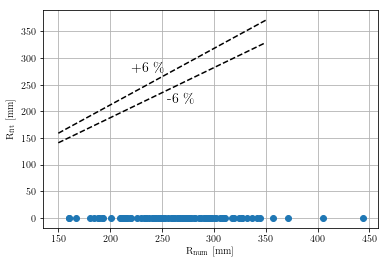

In [16]:
plt.plot(R4,eta((R2,R3,B),M1[0][0],M1[0][1],M1[0][2],M1[0][3]),'o',label  = 'Fit')
plt.plot(B_error,0.94*B_error,'k--')
plt.plot(B_error,1.06*B_error,'k--')
plt.grid()
plt.text(255, 215, '-6 $\%$', fontsize=14)
plt.text(220, 275, '+6 $\%$', fontsize=14)
#plt.legend()
plt.xlabel('R$_\mathrm{num}$ [mm]')
plt.ylabel('R$_\mathrm{fit}$ [mm]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

In [17]:
R_m = np.arange(130,210,1)

[]

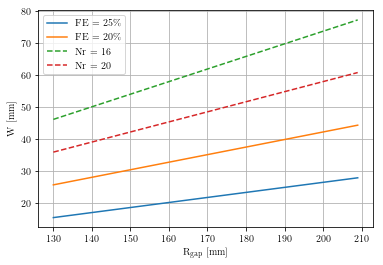

In [18]:
plt.plot(R_m,np.pi*R_m/(2)*(0.35-0.25)-5, label = 'FE = 25\%')
plt.plot(R_m,np.pi*R_m/(2)*(0.35-0.2)-5, label = 'FE = 20\%')

plt.plot(R_m,2*np.pi*R_m/(16)-5,'--', label = 'Nr = 16')
plt.plot(R_m,2*np.pi*R_m/(20)-5,'--', label = 'Nr = 20')

#plt.plot(R_m,2*np.pi*R_m/32,':', label = 'N = 20')
#lt.plot(R_m,np.pi*R_m*0.25/4, label = '4 poles - FM = 25\%')
#plt.plot(R_m,np.pi*R_m*0.35/4, label = '4 poles - FM = 35\%')
plt.xlabel('R$_\mathrm{gap}$ [mm]')
plt.ylabel('W [mm]')
plt.legend()
plt.grid()

plt.savefig('Rgap_W.png',format = 'png', dpi=1000,bbox_inches='tight')

plt.plot()

In [14]:
L_workbook = xlrd.open_workbook('Length.xlsx')
L_worksheet = L_workbook.sheet_by_name('Plan1')

In [15]:
L_workbook = xlrd.open_workbook('Length.xlsx')
R2_L = array(L_worksheet.col_values(0))
R3_L = array(L_worksheet.col_values(1))
R4_L = array(L_worksheet.col_values(2))
L_L = array(L_worksheet.col_values(3))
dQ_L = array(L_worksheet.col_values(4))

In [16]:
def eta_L(X,a,b,c,d,e,f,g): 
    P1,P2,P3,P4 = X
    #return (a*(P1**b)*(P2**c)*(P3**d)*np.log(e*P4))
    return (a*P4**3+b*P4**2 + c*P4 + d)*(P1**e*P2**f*P3**0)
    #return (a*P4**3+b*P4**2 + c*P4 + d)

In [17]:
M_L = curve_fit(eta_L,(R2_L,R3_L,R4_L,L_L),dQ_L,maxfev = 10000)
#M = curve_fit(eta,phi, Qc,bounds=([-100,-100], [100,100]))
M_L[0],M_L[1]

C:\Users\Guilherme\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 0.45238549, -2.34797947,  4.06737728, -1.44601011, -0.14716104,
         0.15172723,  1.        ]), array([[inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf]]))

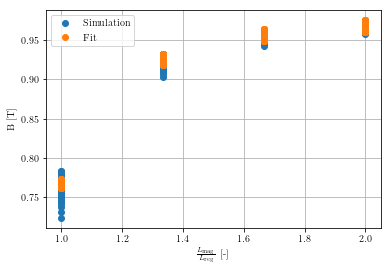

In [18]:
plt.plot(L_L,dQ_L,'o',label = 'Simulation')
plt.plot(L_L,eta_L((R2_L,R3_L,R4_L,L_L),M_L[0][0],M_L[0][1],M_L[0][2],M_L[0][3],M_L[0][4],M_L[0][5],M_L[0][6]),'o',label  = 'Fit')
plt.grid()
plt.legend()
plt.xlabel(r'$\frac{L_\mathrm{mag}}{L_\mathrm{reg}}$ [-]')
plt.ylabel('B [T]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

In [24]:
erro = (dQ_L-eta_L((R2_L,R3_L,R4_L,L_L),M_L[0][0],M_L[0][1],M_L[0][2],M_L[0][3],M_L[0][4],M_L[0][5],M_L[0][6]))/dQ_L*100

In [25]:
L_xt = 0.05
R2 = 150
R3 = 250
(0.45238549*(1+L_xt)**3-2.34797947*(1+L_xt)**2 +4.06737728*(1+L_xt)-1.44601011)*R2**-0.14716104*R3**(0.15172723)

0.8400122355756672

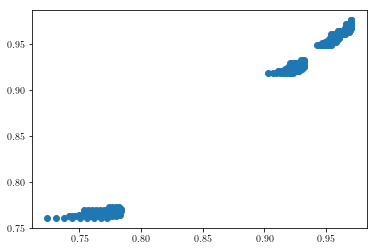

In [26]:
plt.plot(dQ_L,eta_L((R2_L,R3_L,R4_L,L_L),M_L[0][0],M_L[0][1],M_L[0][2],M_L[0][3],M_L[0][4],M_L[0][5],M_L[0][6]),'o')

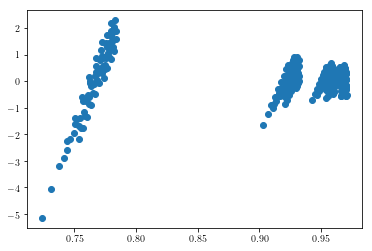

In [27]:
plt.plot(dQ_L,erro,'o')

In [28]:
Rv = np.arange(0.1,2,0.1)

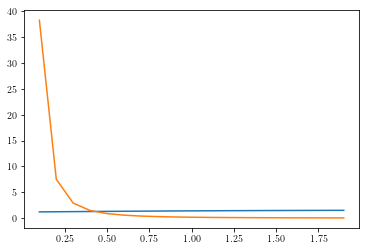

In [29]:
plt.plot(Rv,0.1353*1.43*(0.2)**-0.4603*np.exp(-33.1224/500)*(np.tanh(Rv*0.6693)+3.1078))
plt.plot(Rv,0.1353*1.43*(0.2)**-0.4603*np.exp(-33.1224/500)*(M_L[0][0]*Rv**M_L[0][1]))

In [30]:
erro = abs((np.tanh(Rv*0.6693)+3.1078)-capa(Rv,M_L[0][0],M_L[0][1]))/(np.tanh(Rv*0.6693)+3.1078)*100

NameError: name 'capa' is not defined

In [39]:
def capa(Rv,a,b):
    return(a*Rv**b)

M_L = curve_fit(capa,Rv,(np.tanh(Rv*0.6693)+3.1078))
M_L

(array([3.71049285, 0.08738146]), array([[1.43904920e-04, 9.39467756e-06],
        [9.39467756e-06, 1.91694758e-05]]))

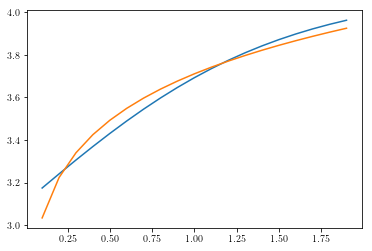

In [40]:
plt.plot(Rv,(np.tanh(Rv*0.6693)+3.1078))
plt.plot(Rv,capa(Rv,M_L[0][0],M_L[0][1]))

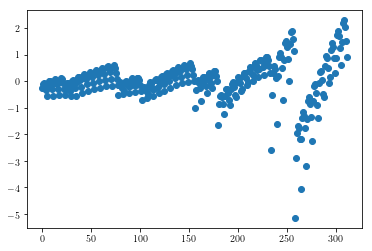

In [41]:
plt.plot(erro,'o')

In [292]:
F_workbook = xlrd.open_workbook('Input.xlsx')
F_worksheet = F_workbook.sheet_by_name('Final')
R2_F = array(F_worksheet.col_values(0))
R3_F = array(F_worksheet.col_values(1))
R4_F = array(F_worksheet.col_values(2))
h_F = array(F_worksheet.col_values(3))
L_F = array(F_worksheet.col_values(4))
B_rem = array(F_worksheet.col_values(5))
B_F = array(F_worksheet.col_values(6))

In [273]:
R5_F = R4_F + h_F

In [274]:
len(R2_F)

152

In [285]:
def Mag(X,a,b,c,d,e,f): 
    R2,R3,R4,h,L,B_rem = X
    #return (0.74794602381*(B_rem)*(R2**1.50307868)*(R3**-2.73422634)*(R4**1.240075)*(np.exp(-33.1224/L))*h**f)
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e/L))*h**f)

In [256]:
def Mag_ad(X,a,b,c,d,e): 
    V_gap,V_mag,V_out,L,B_rem,R4 = X
    return (a*(B_rem)*((V_gap/V_mag)**b)*(np.exp(c*R4/L))*(np.tanh(d*(V_out/V_mag))+e))

In [257]:
def Mag_ad_2(X,a,b,c,d,e,f,g): 
    #V_gap,V_mag,V_out,L,B_rem,R_4 = X
    R2,R3,R4,L,B_rem,R5 = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(np.tanh(f*(R5**2-R4**2)/(R4**2-R3**2))+g))

In [258]:
len(B_F)

1272

In [289]:
M = curve_fit(Mag,(R2_F,R3_F,R4_F,h_F,L_F,B_rem),B_F,maxfev = 10000)
#M_a = curve_fit(Mag_ad,(R3_F**2-R2_F**2,R4_F**2-R3_F**2,R5_F**2-R4_F**2,L_F,B_rem,R4_F),B_F,maxfev = 10000)
#M_b = curve_fit(Mag_ad_2,(R2_F,R3_F,R4_F,L_F,B_rem,R5_F),B_F,maxfev = 10000)
M[0]

array([  1.71951251,   2.10853942,  -3.7047729 ,   1.38270461,
       -19.28562192,   0.06469294])

In [290]:
erro_1 = abs(B_F - Mag((R2_F,R3_F,R4_F,h_F,L_F,B_rem),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4],M[0][5]))/B_F*100
#erro_a = abs(B_F - Mag_ad((R3_F**2-R2_F**2,R4_F**2-R3_F**2,R5_F**2-R4_F**2,L_F,B_rem,R4_F),M_a[0][0],M_a[0][1],M_a[0][2],M_a[0][3],M_a[0][4]))/B_F*100
#erro_b = abs(B_F - Mag_ad_2((R2_F,R3_F,R4_F,L_F,B_rem,R5_F),M_b[0][0],M_b[0][1],M_b[0][2],M_b[0][3],M_b[0][4],M_b[0][5],M_b[0][6]))/B_F*100

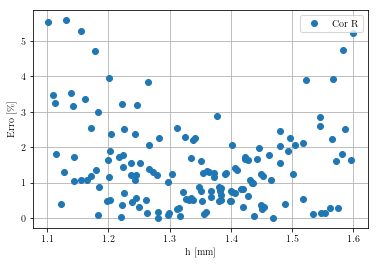

In [298]:
#plt.plot(h_F,erro_a,'o',label = 'Cor V')
#plt.plot(B_F,erro,'x',label = 'Cor R')
plt.plot(B_F,erro_1,'o',label = 'Cor R')
plt.legend()
plt.grid()
plt.xlabel('h [mm]')
plt.ylabel('Erro [$\%$]')
plt.savefig('Erro_Cor.png',format = 'png', dpi=1000,bbox_inches='tight')

In [763]:
mean(erro)
mean(erro_a)

1.7296155573726313

In [764]:
aux = np.arange(0.7,2,0.1)

ValueError: not enough values to unpack (expected 6, got 5)

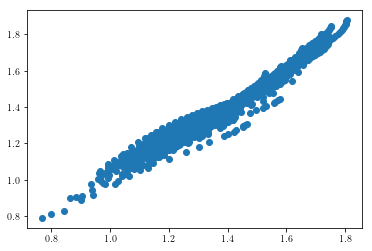

In [765]:
plt.plot(B_F,Mag((R2_F,R3_F,R4_F,h_F,L_F,B_rem),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4],M[0][5]),'o')
plt.plot(B_F,Mag_ad((R3_F**2-R2_F**2,R4_F**2-R3_F**2,R5_F**2-R4_F**2,L_F,B_rem),M_a[0][0],M_a[0][1],M_a[0][2],M_a[0][3]),'x')
plt.plot(aux,0.9*aux,'k--')
plt.plot(aux,1.1*aux,'k--')
plt.grid()
plt.ylabel('B$_\mathrm{Fitting}$')
plt.xlabel('B$_\mathrm{Numerical}$')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

In [295]:
F_workbook = xlrd.open_workbook('Input.xlsx')
D_worksheet = F_workbook.sheet_by_name('Demag')
R2_D = array(D_worksheet.col_values(0))
R3_D = array(D_worksheet.col_values(1))
R4_D = array(D_worksheet.col_values(2))
h_D = array(D_worksheet.col_values(3))
L_D = array(D_worksheet.col_values(4))
B_rem_D = array(D_worksheet.col_values(5))
B_D = array(D_worksheet.col_values(6))
Dmag = array(D_worksheet.col_values(7))
Sat = array(D_worksheet.col_values(8))
Coerc = array(D_worksheet.col_values(9))

In [296]:
R5_D = R4_D + h_D
B_A = B_D/B_rem_D

In [1158]:
V_rot = np.pi*(R4_D**2 - R3_D**2)
V_out = np.pi*(R5_D**2 - R4_D**2)
V_gap = np.pi*(R3_D**2 - R2_D**2)
V_stt = np.pi*(R2_D**2 - 30**2)

In [1159]:
def DMag(X,a,c,d,e,f,g): 
    R3,R4,h,L,B = X
    return (a*(R3**c)*(R4**d)*(h**f)*(L**e)*(B)**g)

In [1167]:
def DMag_ad(X,a,b,c,d,e,f,g):
    V_rot_d,V_out_d,B_d,L,h,V_stt = X
    return(a*(V_rot_d**b)*(V_out_d**c)*((L**d))*(B_d**e)*h**f*V_stt**g)

In [1168]:
#DM = curve_fit(DMag,(R3_D,R4_D,h_D,L_D,B_D),Sat,maxfev = 10000000)
#DM

In [1169]:
len(Dmag)

335

In [1170]:
DM_ad = curve_fit(DMag_ad,(V_gap/V_rot,V_out/V_rot,B_rem_D,L_D,h_D,V_stt/V_rot),Dmag,maxfev = 10000000)
DM_ad[0]

array([ 1.29134506e+05, -8.83094776e+00,  9.38573381e+00,  1.28028411e-01,
        5.14053698e+01, -9.83535058e+00,  1.05562471e+00])

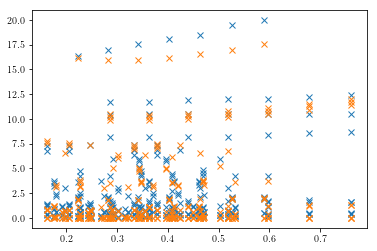

In [1171]:
plt.plot(V_out/V_rot,Dmag,'x')
#plt.plot(DMag((R3_D,R4_D,h_D,L_D,B_D),DM[0][0],DM[0][1],DM[0][2],DM[0][3],DM[0][4],DM[0][5]),'x')
plt.plot(V_out/V_rot,DMag_ad((V_gap/V_rot,V_out/V_rot,B_rem_D,L_D,h_D,V_stt/V_rot),DM_ad[0][0],DM_ad[0][1],DM_ad[0][2],DM_ad[0][3],DM_ad[0][4],DM_ad[0][5],DM_ad[0][6]),'x')

In [1172]:
erro = abs(Dmag - DMag_ad((V_gap/V_rot,V_out/V_rot,B_rem_D,L_D,h_D,V_stt/V_rot),DM_ad[0][0],DM_ad[0][1],DM_ad[0][2],DM_ad[0][3],DM_ad[0][4],DM_ad[0][5],DM_ad[0][6]))

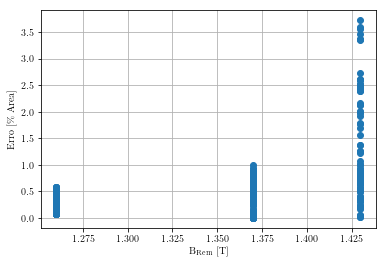

In [1174]:
#plt.plot(erro1,'o')
plt.plot(B_rem_D,erro,'o')
plt.grid()
plt.xlabel('B$_\mathrm{Rem}$ [T]')
plt.ylabel('Erro [$\%$ Area]')
plt.savefig('Erro_Dmag.png',format = 'png', dpi=1000,bbox_inches='tight')

In [144]:
len(L_D)

1584